In [4]:
import  pandas as pd
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [5]:
 X,y =make_blobs(n_samples = 1000 ,centers = 3 ,n_features = 2, random_state = 23)

In [6]:
X.shape

(1000, 2)

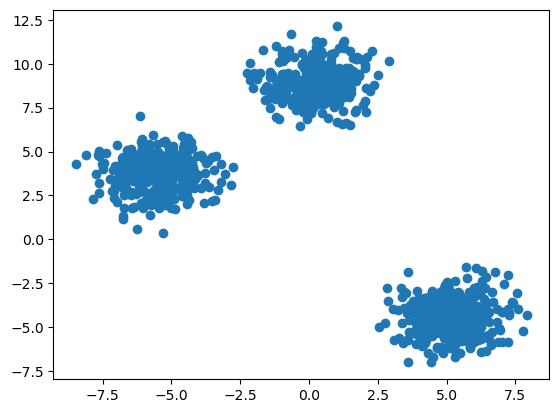

In [7]:
plt.scatter( X[:,0],X[:,1])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [18]:
from sklearn.cluster import KMeans

In [24]:
# ELBOW METHOD (MANNUAL PROCESS)
#ELBOW METHOD to select the K-value
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k , init ='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [32]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1183.7803143134097,
 1050.4361106114907,
 955.7480310095978,
 772.0203865474425,
 671.6978991836993,
 633.0902315507506,
 549.6860001453872]

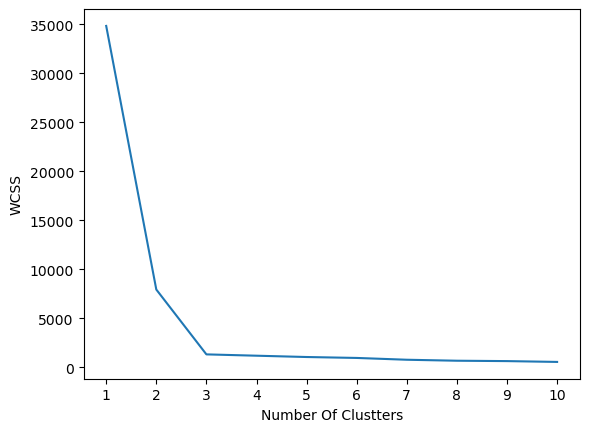

In [42]:
 # PLOTING A ELBOW CURVE

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number Of Clustters")
plt.ylabel("WCSS")
plt.show()

In [46]:
kmeans = KMeans(n_clusters =3,init="k-means++")

In [72]:
y_test_labels = kmeans.predict(X_test)

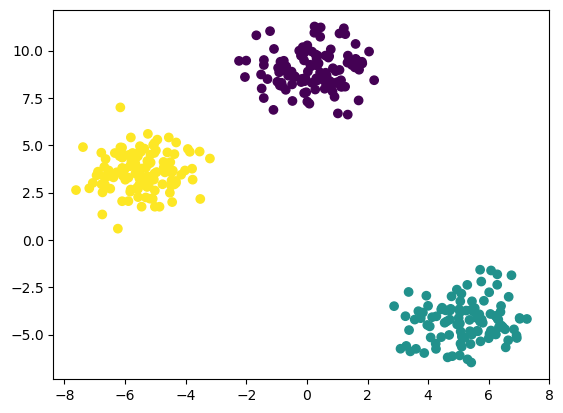

In [74]:
plt.scatter(X_test[:,0],X_test[:,1] , c=y_test_labels)
plt.show()

In [76]:
  # KNEE LOCATOR (auto finds the value of K)
!pip install kneed

In [95]:
from kneed import KneeLocator

In [111]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction ='decreasing')
kl.elbow

3

In [113]:
# PERFORMANCE METRICES
# silhoutte score
from sklearn.metrics import silhouette_score

In [117]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans =KMeans(n_clusters =k , init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [121]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6577001867782686,
 0.4814001336222496,
 0.33401666037851213,
 0.34520917727457456,
 0.33324708008897586,
 0.33307729320141233,
 0.32899658931180537]

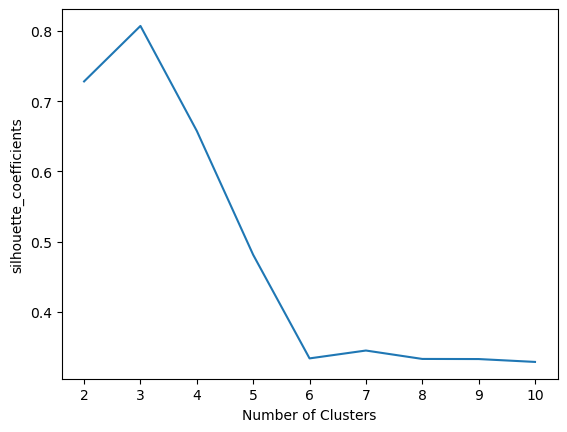

In [123]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()